## Importing necessary libraries

In [4]:
import numpy as np
import pandas as pd

## Loading the dataset

In [5]:
df = pd.read_csv("salaries_clean.csv")

## Displaying the entire dataset

In [6]:
df

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0
...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,Senior,FT,US,M,100,147044.0
603,2022,Data Engineer,Senior,FT,US,M,100,120309.0
604,2022,Data Analyst,Senior,FT,US,M,0,123174.0
605,2022,Data Analyst,Senior,FT,US,M,100,143225.0


## Displaying information about the dataset (data types, non-null counts, etc.)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            607 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 38.1+ KB


## Displaying the column names of the dataset

In [8]:
df.columns

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')

## Importing Matplotlib for data visualization

In [9]:
import matplotlib.pyplot as plt

## Creating a plot to visualize the distribution of salaries

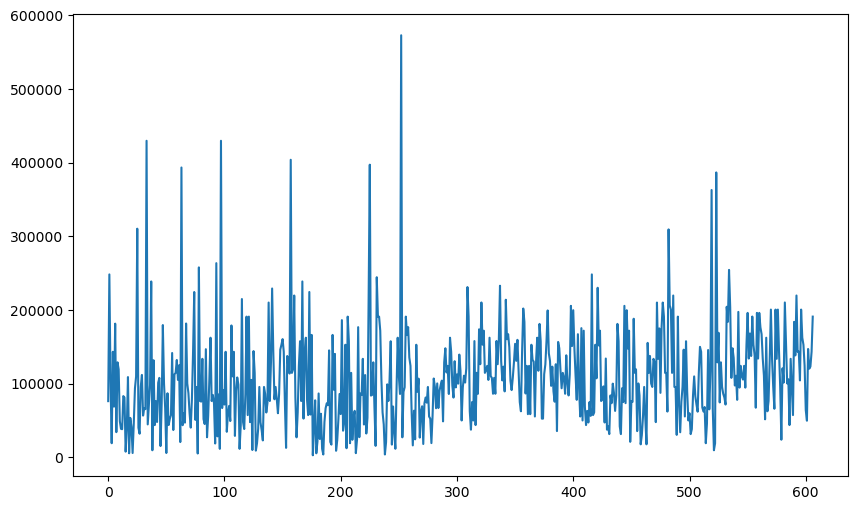

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df["Salary_USD"])

## Check for outliers in the 'Salary_USD' column

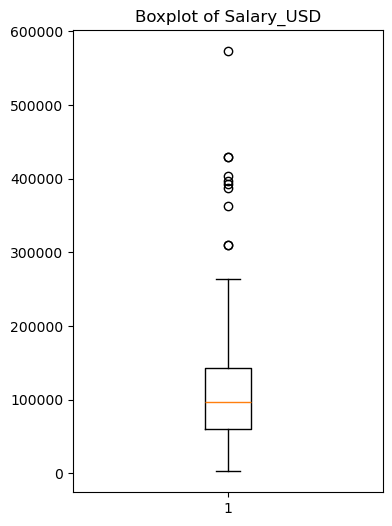

In [14]:
plt.figure(figsize=(4, 6))
plt.boxplot(df["Salary_USD"])
plt.title('Boxplot of Salary_USD')
plt.show()

## Summarizing the dataset statistics

In [15]:
summary_stats = df.describe()
summary_stats

,Working_Year,Remote_Working_Ratio,Salary_USD
count,607.000000,607.00000,607.000000
mean,2021.405272,70.92257,107225.836903
std,0.692133,40.70913,67752.393254
min,2020.000000,0.00000,2730.000000
25%,2021.000000,50.00000,59893.000000
50%,2022.000000,100.00000,96982.000000
75%,2022.000000,100.00000,143225.000000
max,2022.000000,100.00000,572900.000000


## Calculating correlation matrix for numerical columns

In [16]:
num_cols = df.select_dtypes(include=['number'])
num_cols.corr()

,Working_Year,Remote_Working_Ratio,Salary_USD
Working_Year,1.000000,0.076314,0.170493
Remote_Working_Ratio,0.076314,1.000000,0.132123
Salary_USD,0.170493,0.132123,1.000000


## Splitting the dataset into Train and Test sets

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('Salary_USD', axis=1)
y = df['Salary_USD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio
9,2020,Lead Data Engineer,Senior,FT,NZ,S,50
227,2021,Data Scientist,Mid,FT,DE,L,50
591,2022,Data Architect,Senior,FT,US,M,100
516,2022,Data Science Manager,Senior,FT,US,M,100
132,2021,Applied Machine Learning Scientist,Mid,FT,VN,M,100
...,...,...,...,...,...,...,...
71,2020,Data Scientist,Mid,FT,FR,S,50
106,2021,Research Scientist,Mid,FT,CA,L,100
270,2021,Data Engineer,Entry,FT,US,L,100
435,2022,Data Engineer,Mid,FT,GB,M,100


In [19]:
X_test

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio
563,2022,Data Engineer,Senior,FT,US,M,100
289,2022,Data Engineer,Senior,FT,US,M,100
76,2021,BI Data Analyst,Mid,FT,US,M,100
78,2021,ML Engineer,Mid,CT,US,L,100
182,2021,Data Engineer,Mid,FT,RO,L,0
...,...,...,...,...,...,...,...
249,2021,Principal Data Analyst,Senior,FT,US,M,100
365,2022,Data Scientist,Senior,FT,US,M,100
453,2022,Machine Learning Engineer,Mid,FT,US,S,100
548,2022,Data Analyst,Senior,FT,US,M,100


In [20]:
y_train

9      119354.0
227     84650.0
591    138312.0
516    145612.0
132     36666.0
         ...   
71      40291.0
106    178976.0
270     69225.0
435     87476.0
102     34621.0
Name: Salary_USD, Length: 485, dtype: float64

In [21]:
y_test

563    133915.0
289    128903.0
76      95483.0
78     257805.0
182     24830.0
         ...   
249    162322.0
365    132340.0
453    114580.0
548     94576.0
235    105032.0
Name: Salary_USD, Length: 122, dtype: float64